In [1]:
import numpy as np
import csv
import pandas as pd

In [2]:
set1 = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/Part1_data/dataset_1/S1.txt', sep = "    ")
set2 = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/Part1_data/dataset_1/S2.txt', sep = "    ")
set3 = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/Part1_data/dataset_1/S3.txt', sep = "    ")
set4 = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/Part1_data/dataset_1/S4.txt', sep = "    ")

In [3]:
dataset1 = set1.values
dataset2 = set2.values
dataset3 = set3.values
dataset4 = set4.values

In [4]:
dataset1

array([[665845, 557965],
       [597173, 575538],
       [618600, 551446],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]], dtype=int64)

In [5]:
all_sets = np.concatenate((dataset1, dataset2, dataset3, dataset4), axis =  0)


In [6]:
all_sets

array([[665845, 557965],
       [597173, 575538],
       [618600, 551446],
       ...,
       [569266, 738385],
       [444587, 878830],
       [434041, 814466]], dtype=int64)

In [7]:
import matplotlib.pyplot as plt

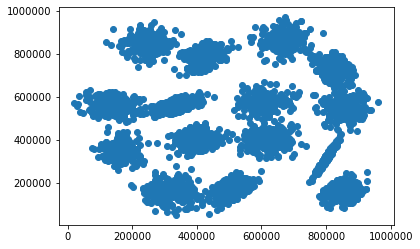

In [8]:
plt.scatter(dataset1[:,0],dataset1[:,1])

In [9]:
def centroid_1(clusters, iterations, data_x = [], data_y = []):
    centroids = np.empty([clusters,2])
    min_x = data_x[0]
    min_y = data_y[0]
    distance_min = (data_x[0] + data_y[0])**2
    sum_distance_x = 0
    sum_distance_y = 0
    for i in range(iterations):
        sum_distance_x = 0
        sum_distance_y = 0
        for j in range((clusters)):
            for k in range(len(data_x)):
                sum_distance_x += (data_x[k] - centroids[j,0])**2
                sum_distance_y += (data_y[k] - centroids[j,1])**2
            distance = (sum_distance_x**2 - sum_distance_y**2)**0.5 
            if distance < distance_min:
                distance_min = distance
            for k in range(2):
                centroids[j,k] = distance

    return centroids

In [10]:
centoids = centroid_1(14, 100, dataset1[:,0], dataset1[:,1])

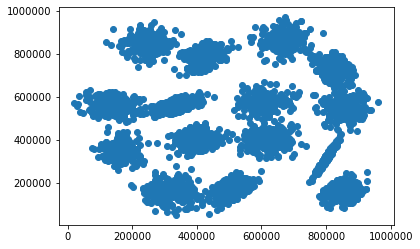

In [11]:
plt.scatter(dataset1[:,0],dataset1[:,1])
plt.plot(centoids[:,0],centoids[:,1], 'ro')

In [12]:
 from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=14, random_state=0).fit(dataset1)

In [14]:
centroids = kmeans.cluster_centers_

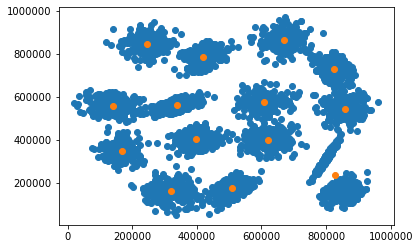

In [15]:
plt.scatter(dataset1[:,0],dataset1[:,1])
plt.scatter(centroids[:,0], centroids[:,1])

In [16]:
def clustering(data = []):
    km = KMeans(n_clusters=1).fit(data)
    inital_intertial = km.inertia_
    for i in range(1,15):
        km = KMeans(n_clusters=i).fit(data)
        if(km.inertia_/inital_intertial<0.02):
            return km.cluster_centers_
    print('error')
    return km.cluster_centers_


In [17]:
center1 = clustering(dataset1)
center2 = clustering(dataset2)
center3 = clustering(dataset3)
center4 = clustering(dataset4)

error
error
error
error


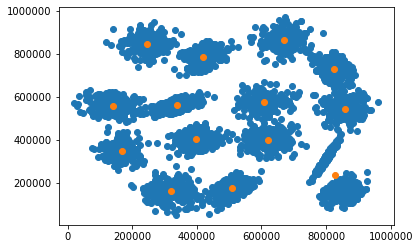

In [18]:
plt.scatter(dataset1[:,0],dataset1[:,1])
plt.scatter(center1[:,0], center1[:,1])

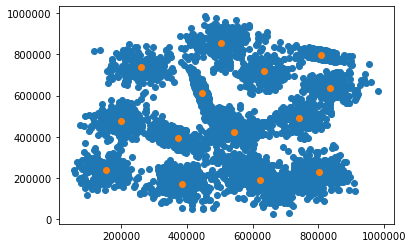

In [19]:
plt.scatter(dataset2[:,0],dataset2[:,1])
plt.scatter(center2[:,0], center2[:,1])

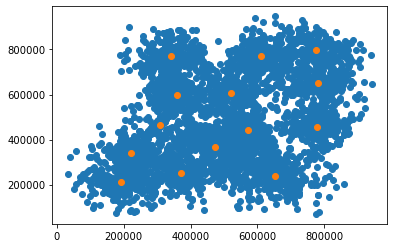

In [20]:
plt.scatter(dataset3[:,0],dataset3[:,1])
plt.scatter(center3[:,0], center3[:,1])

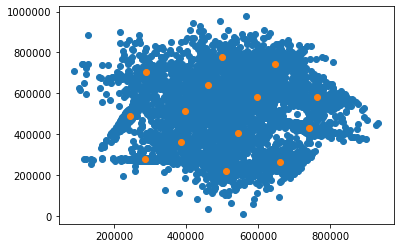

In [21]:
plt.scatter(dataset4[:,0],dataset4[:,1])
plt.scatter(center4[:,0], center4[:,1])

In [22]:
set_dim32 = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/Part1_data/dataset_2/dim32.txt', sep= '   ')

In [23]:
set_dim32.head()

84  152  100   52   95  186  169  106   37  186.1  ...  190   65  214  116  \
0  86  149  101   56   93  181  171  116   37    192  ...  191   79  215  116   
1  83  149   99   51   96  187  169  108   34    191  ...  190   65  213  118   
2  86  142  101   64  105  183  172  116   49    180  ...  186   69  209  120   
3  89  145  108   54   91  180  175  107   35    192  ...  188   67  212  118   
4  84  152  100   52   96  187  171  109   38    187  ...  190   64  216  114   

    75   55.1  123   65.1  154  177  
0   76     60  130     71  151  181  
1   73     55  125     63  155  178  
2   68     56  123     67  144  181  
3   91     50  135     58  147  165  
4   76     54  124     64  153  176  

[5 rows x 32 columns]

In [24]:
data_dim32 = set_dim32.values

In [25]:
data_dim32

array([[ 86, 149, 101, ...,  71, 151, 181],
       [ 83, 149,  99, ...,  63, 155, 178],
       [ 86, 142, 101, ...,  67, 144, 181],
       ...,
       [101,  52, 171, ..., 132,  98,  73],
       [106,  59, 165, ..., 131,  98,  73],
       [105,  53, 168, ..., 132,  98,  75]], dtype=int64)

In [26]:
km_init = KMeans(n_clusters=1).fit(data_dim32)
km_inertia_init = km_init.inertia_
clusters = 0
for i in range(1,100):
    km_dim32 = KMeans(n_clusters=i).fit(data_dim32)
    if(km_dim32.inertia_/km_inertia_init < 0.02):
        print(km_dim32.predict(data_dim32))
        break

[11 11 11 ... 10 10 10]


In [27]:
set_spiral = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/Part1_data/dataset_3/spiral.txt', sep= '	')

In [28]:
set_spiral.head()

31.95  7.95  3
0  31.15  7.30  3
1  30.45  6.65  3
2  29.70  6.00  3
3  28.90  5.55  3
4  28.05  5.00  3

In [29]:
km = KMeans(n_clusters=3).fit(set_spiral.values[:,:2])
clusters_spiral = km.cluster_centers_

In [30]:
clusters_spiral

array([[20.95090909,  9.71545455],
       [23.62920792, 22.31485149],
       [10.2025    , 17.691     ]])

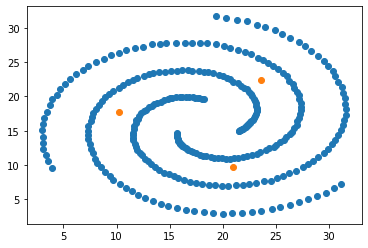

In [31]:
plt.scatter(set_spiral.values[:,0], set_spiral.values[:,1])
plt.scatter(clusters_spiral[:,0], clusters_spiral[:,1])

In [32]:
movies = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/ml-1m/movies.dat',sep = '::')

In [33]:
movies.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [34]:
ratings = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/ml-1m/ratings.dat',sep = '::')
ratings.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [35]:
users = pd.read_csv('C:/Users/balto/OneDrive/Desktop/Lab2/Lab2/ml-1m/ratings.dat',sep = '::')
users.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [36]:
from mpl_toolkits.mplot3d import Axes3D

In [37]:
ratings_data = ratings.values[:,:3]

In [38]:
ratings_data

array([[   1, 1193,    5],
       [   1,  661,    3],
       [   1,  914,    3],
       ...,
       [6040,  562,    5],
       [6040, 1096,    4],
       [6040, 1097,    4]], dtype=int64)

In [39]:
inertia_init = KMeans(n_clusters= 1).fit(ratings_data)
inertia_init = inertia_init.inertia_
clusters = 0
for i in range(1, 15):
    inertia = KMeans(n_clusters=i).fit(ratings_data)
    inertia = inertia.inertia_
    if(inertia/inertia_init < 0.2):
        clusters = KMeans(n_clusters= i).fit(ratings_data)
        clusters = clusters.cluster_centers_

In [40]:
clusters

array([[3.19179822e+03, 2.98517507e+03, 3.48320817e+00],
       [3.09265453e+03, 1.49309132e+03, 3.72461423e+00],
       [5.21120058e+03, 4.51147771e+02, 3.61837421e+00],
       [6.87727317e+02, 1.55031942e+03, 3.65871970e+00],
       [5.45454765e+03, 2.94959632e+03, 3.51826247e+00],
       [1.84767039e+03, 3.40034960e+03, 3.50012154e+00],
       [3.61117311e+03, 4.43424569e+02, 3.58101775e+00],
       [6.32497932e+02, 3.06211193e+03, 3.48260053e+00],
       [4.25424808e+03, 1.68547653e+03, 3.61731093e+00],
       [5.48658214e+03, 1.50504159e+03, 3.71552637e+00],
       [1.95868711e+03, 7.66166003e+02, 3.70983082e+00],
       [1.80998873e+03, 2.20107596e+03, 3.41079362e+00],
       [4.28497767e+03, 3.19276154e+03, 3.49052815e+00],
       [7.26481218e+02, 4.39310825e+02, 3.57821643e+00]])